In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('market.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
new_cols = ['Invoice_ID', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating']
df.columns = new_cols
del df['Invoice_ID']

In [5]:
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   branch                   1000 non-null   object 
 1   city                     1000 non-null   object 
 2   customer_type            1000 non-null   object 
 3   gender                   1000 non-null   object 
 4   product_line             1000 non-null   object 
 5   unit_price               1000 non-null   float64
 6   quantity                 1000 non-null   int64  
 7   tax_5%                   1000 non-null   float64
 8   total                    1000 non-null   float64
 9   date                     1000 non-null   object 
 10  time                     1000 non-null   object 
 11  payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

In [7]:
df.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


- **Общая выручка (Total):**  
  Диапазон значений составляет от 10.68 до 1042.65, со средним значением 322.97 долларов.

- **Количество товаров (Quantity):**  
  Покупатели приобретают от 1 до 10 товаров, в среднем 5.51 товара за покупку.

- **Рейтинг (Rating):**  
  Оценки варьируются от 4 до 10, со средним значением 6.97.

In [8]:
df.isnull().sum()

branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

### EDA

**Анализ продаж по времени**

- В какие дни недели продажи самые высокие?
- В какое время суток совершается больше покупок?
- В какие часы пиковая активность?

In [10]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = pd.to_datetime(df['time']).dt.hour

df['time_of_day'] = pd.cut(df['hour'], bins = [8, 12, 16, 20], labels = ['Morning', 'Afternoon', 'Evening'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2157106429.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


  day_of_week       total
0      Friday  43926.3405
1      Monday  37899.0780
2    Saturday  56120.8095
3      Sunday  44457.8925
4    Thursday  45349.2480
5     Tuesday  51482.2455
6   Wednesday  43731.1350


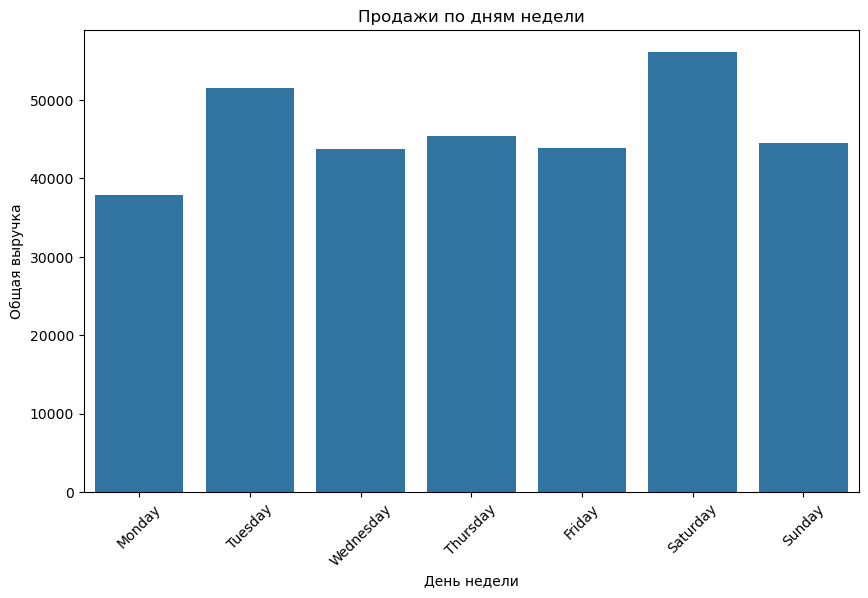

In [11]:
daily_sales = df.groupby('day_of_week')['total'].sum().reset_index()
print(daily_sales)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day_of_week'] = pd.Categorical(daily_sales['day_of_week'], categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values('day_of_week')

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_sales, x='day_of_week', y='total')
plt.title('Продажи по дням недели')
plt.xlabel('День недели')
plt.ylabel('Общая выручка')
plt.xticks(rotation=45)
plt.show()

- Нужно сделать скидки в понедельник как чёрная пятница.
- В вторник и субботе кассиром надо работать внимательно и быстрее а рабочим нужно уделять больше внимания и помочь выбором клиентом.

  time_of_day       total
0     Morning   87864.693
1   Afternoon  121957.458
2     Evening  113144.598


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2516721278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_sales = df.groupby('time_of_day')['total'].sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2516721278.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_of_day_sales, x='time_of_day', y='total',palette = 'viridis', order=['Morning', 'Afternoon', 'Evening'])


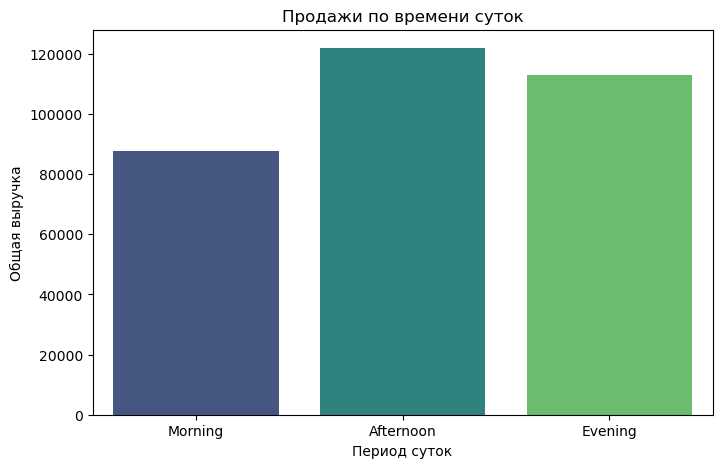

In [12]:
time_of_day_sales = df.groupby('time_of_day')['total'].sum().reset_index()
print(time_of_day_sales)
plt.figure(figsize=(8, 5))
sns.barplot(data=time_of_day_sales, x='time_of_day', y='total',palette = 'viridis', order=['Morning', 'Afternoon', 'Evening'])
plt.title('Продажи по времени суток')
plt.xlabel('Период суток')
plt.ylabel('Общая выручка')
plt.show()

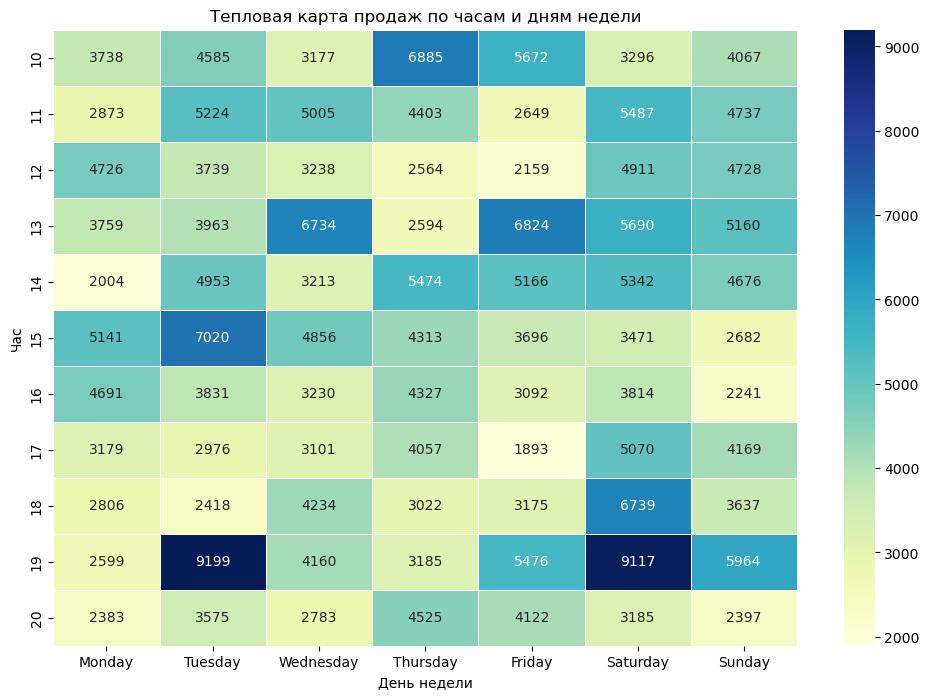

In [13]:
heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='total', aggfunc='sum')
heatmap_data = heatmap_data[days_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Тепловая карта продаж по часам и дням недели')
plt.xlabel('День недели')
plt.ylabel('Час')
plt.show()

Из этих анализа продажа по времени можем взять несколько инсайтов, что в какие период суток, часы и дни недели самые высокие спрос продажов и упомянуть в менеджера по продажа что можемь сделать в эти время для развития продаж.

**Анализ по локациям и филиалам**

- Как распределяются продажи между филиалами и городами?
- Есть ли филиалы с аномальными показателями?
- Какие филиалы/города имеют самые высокие показатели?

,branch,total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\912122790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_sales, x='branch', y='total', palette='viridis')


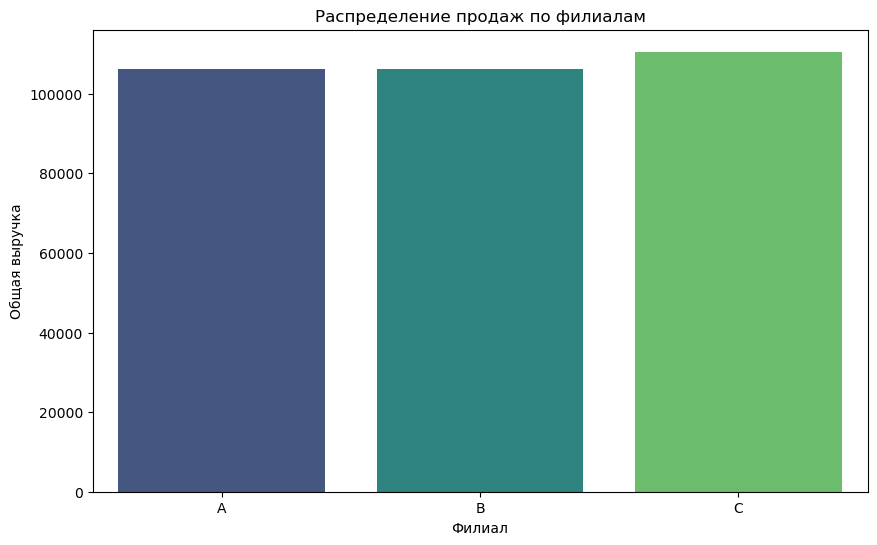

In [14]:
branch_sales = df.groupby('branch')['total'].sum().reset_index()
display(branch_sales)
plt.figure(figsize=(10, 6))
sns.barplot(data=branch_sales, x='branch', y='total', palette='viridis')
plt.title('Распределение продаж по филиалам')
plt.xlabel('Филиал')
plt.ylabel('Общая выручка')
plt.show()

Если посмотреть в статистике то мы заметем что в филиал C больше выручка.

In [15]:
df.groupby(['city', 'branch']).count()['total'].reset_index()

,city,branch,total
0,Mandalay,B,332
1,Naypyitaw,C,328
2,Yangon,A,340


,city,total
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\1811057552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = city_sales, x = 'city', y = 'total', palette = 'viridis')


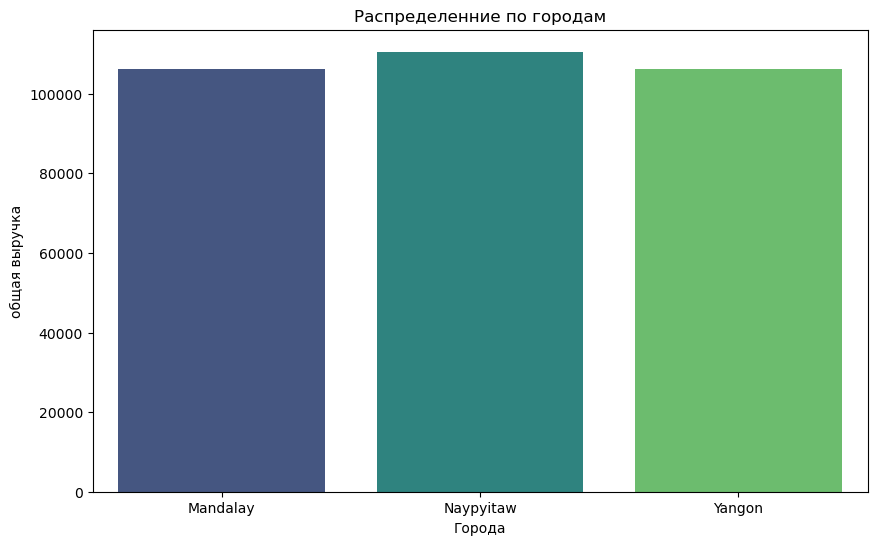

In [16]:
city_sales = df.groupby('city')['total'].sum().reset_index()
display(city_sales)

plt.figure(figsize = (10,6))
sns.barplot(data = city_sales, x = 'city', y = 'total', palette = 'viridis')
plt.title('Распределенние по городам')
plt.xlabel('Города')
plt.ylabel('общая выручка')
plt.show()

In [17]:
branch_metrics = df.groupby('branch').agg({
    'total': 'sum',
    'cogs': 'sum',
    'gross_income': 'sum'
}).reset_index()
branch_metrics

,branch,total,cogs,gross_income
0,A,106200.3705,101143.21,5057.1605
1,B,106197.6720,101140.64,5057.0320
2,C,110568.7065,105303.53,5265.1765


,branch,total,cogs,gross_income
2,C,110568.7065,105303.53,5265.1765
0,A,106200.3705,101143.21,5057.1605
1,B,106197.6720,101140.64,5057.0320


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\3876261926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gross_income_percentage, x='branch', y='gross_income', palette='Blues_d')


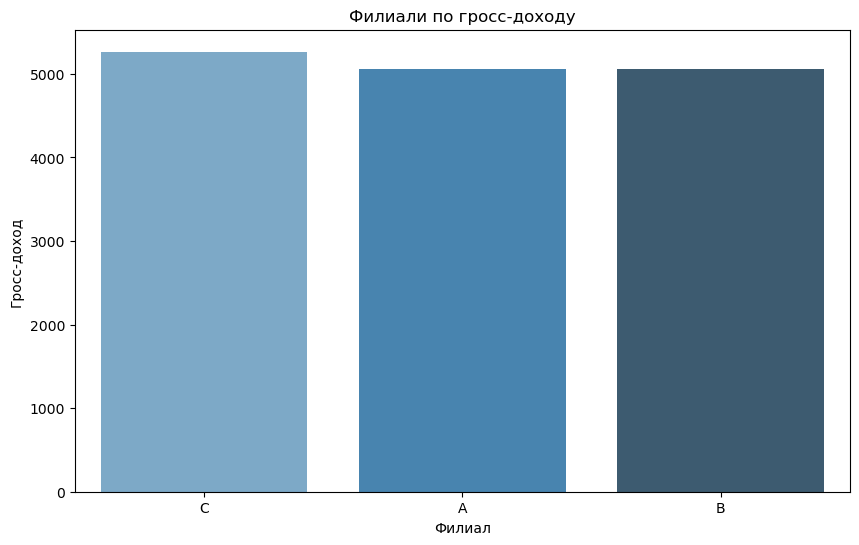

In [18]:
gross_income_percentage = branch_metrics.sort_values('gross_income', ascending=False)
display(gross_income_percentage)
plt.figure(figsize=(10, 6))
sns.barplot(data=gross_income_percentage, x='branch', y='gross_income', palette='Blues_d')
plt.title('Филиали по гросс-доходу')
plt.xlabel('Филиал')
plt.ylabel('Гросс-доход')
plt.show()

Все филиалы (A, B, C) имеют одинаковую маржу 4.76%, что говорит о стабильности бизнеса. Филиал C показывает немного более высокие продажи, возможно, из-за лучшего расположения или акций. Чтобы увеличить прибыль, стоит пересмотреть цены, оптимизировать затраты и изучить успешные практики филиала C для их внедрения в других филиалах

**Товарные категории**

,product_line,total
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2840962388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_revenue, x='product_line', y='total', palette='viridis')


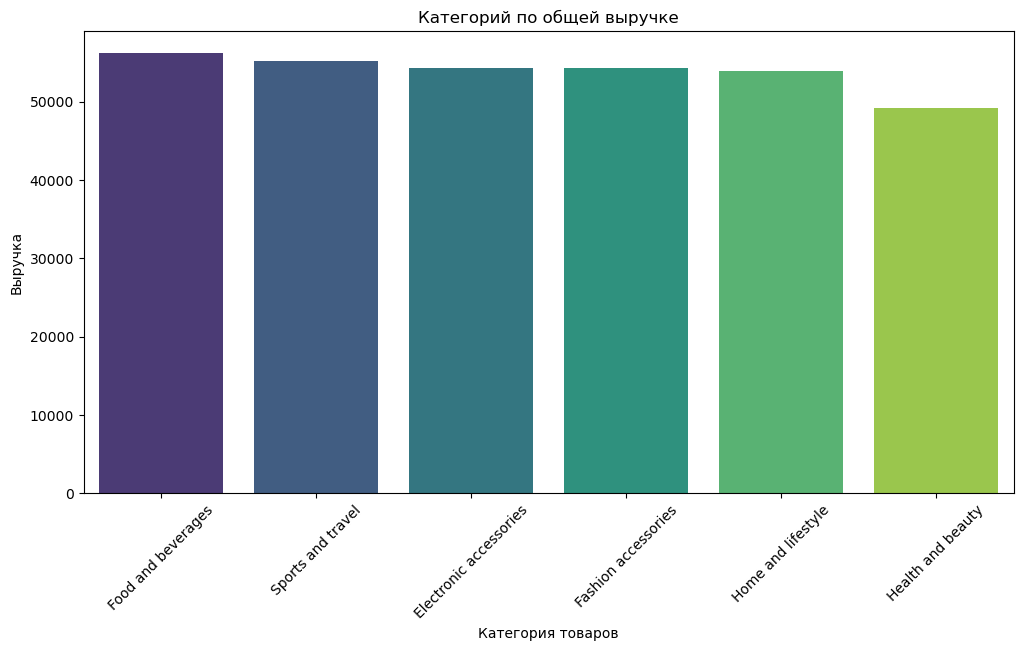

In [19]:
product_revenue = df.groupby('product_line')['total'].sum().reset_index().sort_values('total', ascending=False)
display(product_revenue)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_revenue, x='product_line', y='total', palette='viridis')
plt.title('Категорий по общей выручке')
plt.xlabel('Категория товаров')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.show()

,product_line,quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


C:\Users\HP\AppData\Local\Temp\ipykernel_16988\1885244264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_quantity, x='product_line', y='quantity', palette='mako')


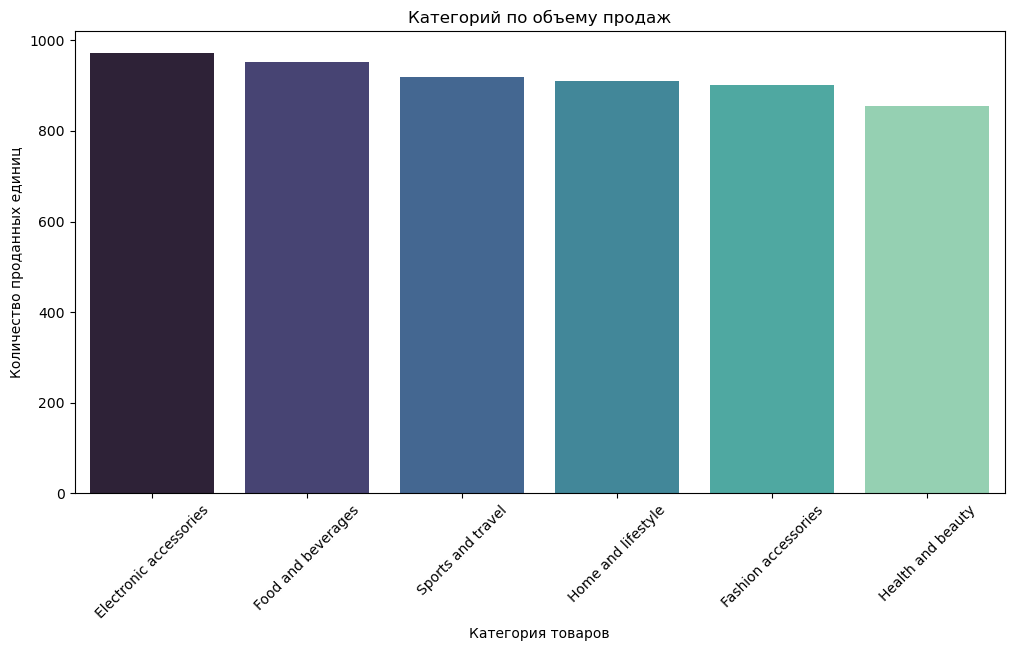

In [20]:
product_quantity = df.groupby('product_line')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
display(product_quantity)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_quantity, x='product_line', y='quantity', palette='mako')
plt.title('Категорий по объему продаж')
plt.xlabel('Категория товаров')
plt.ylabel('Количество проданных единиц')
plt.xticks(rotation=45)
plt.show()

Категории "Food and beverages", "Sports and travel" и "Electronic accessories" лидируют как по выручке, так и по объему продаж. Эти ключевые категории, которые приносят наибольшую прибыль и пользуются высоким спросом. Надо увеличить запасы и ассортимент.

"Health and beauty" отстает как по выручке, так и по объему продаж. Это может быть связано с низким спросом, высокой конкуренцией или неэффективным ценообразованием. Требуется анализ причин и запуск акций для стимулирования продаж. Провести опрос клиентов, чтобы выяснить причины низких продаж. Запустить акции или скидки для стимулирования спроса. Рассмотреть возможность повышения цен, если это не повлияет на спрос.

In [21]:
df.gender.value_counts()

gender
Female    501
Male      499
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_16988\1891467000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'gender', palette = 'Set2')


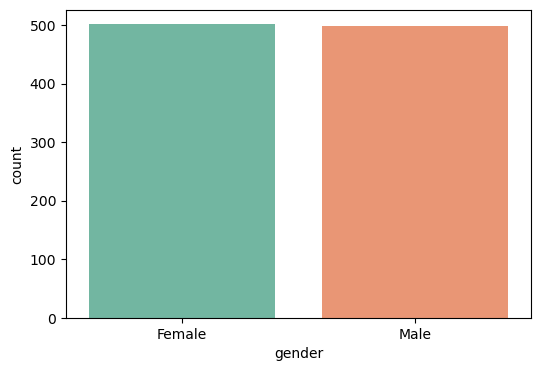

In [22]:
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'gender', palette = 'Set2')
plt.show()

Количество женшины и мужчини которые входять в супермаркете почти одинаковы.

gender  product_line          
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
Name: total, dtype: int64


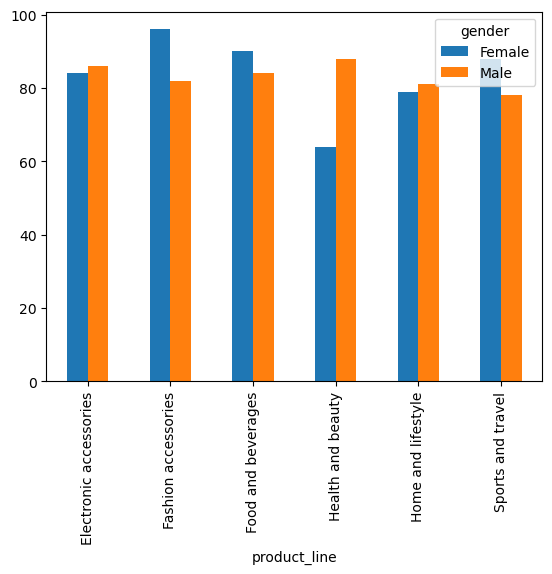

In [23]:
male_female_shoppers = df.groupby(['gender', 'product_line']).count()['total']
print(male_female_shoppers)
male_female_shoppers.unstack(level = 0).plot(kind = 'bar')
plt.show()

- **Маркетинг по полу**  
Продвигать модные аксессуары для женщин и гаджеты для мужчин. Больше делать рекламу.  

- **Акции и спецпредложения**  
Давать скидку на аксессуары при покупке электроники.  

- **Расширение ассортимента**  
Разобраться, почему женщины меньше покупают товары для красоты. Добавить новые бренды или акции.  

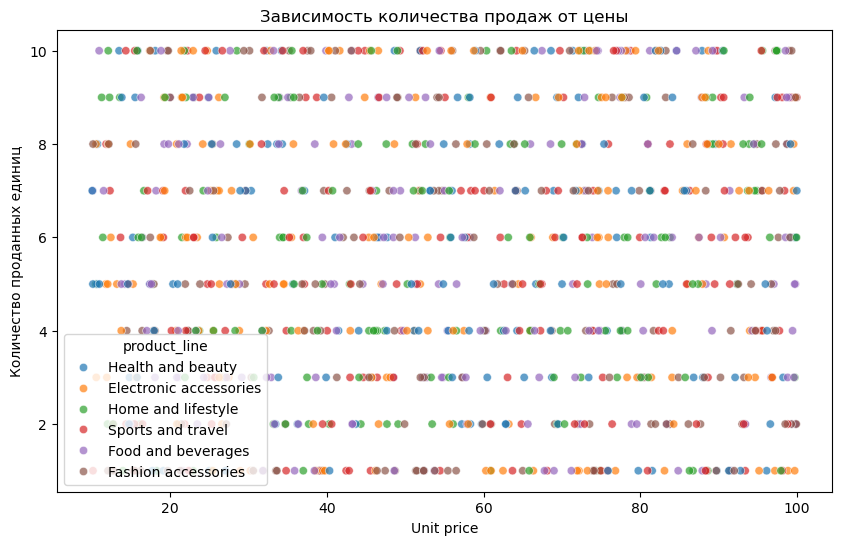

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='unit_price', y='quantity', hue='product_line', alpha=0.7)
plt.title('Зависимость количества продаж от цены')
plt.xlabel('Unit price')
plt.ylabel('Количество проданных единиц')
plt.show()

Цены выше 80 не снижают количество продаж:

Видно, что товары с высокой ценой (80–100) также могут продаваться в больших объемах (до 10 единиц).
Это может означать, что клиенты готовы покупать дорогие товары в значительном количестве.

Наличие популярных ценовых диапазонов:

В среднем товары с ценой от 10 до 60 продаются наиболее активно.
Это может быть полезно для ценообразования и анализа ассортимента.

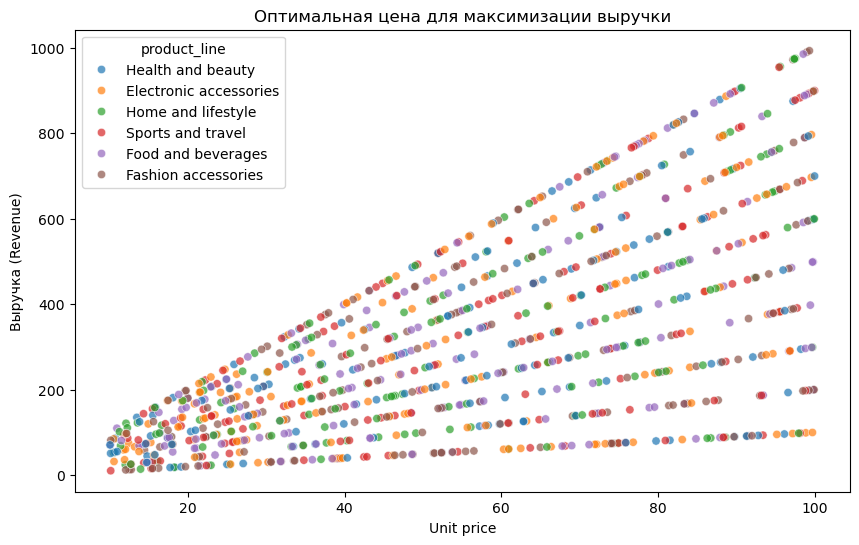

In [25]:
df['revenue'] = df['unit_price'] * df['quantity']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='unit_price', y='revenue', hue='product_line', alpha=0.7)
plt.title('Оптимальная цена для максимизации выручки')
plt.xlabel('Unit price')
plt.ylabel('Выручка (Revenue)')
plt.show()

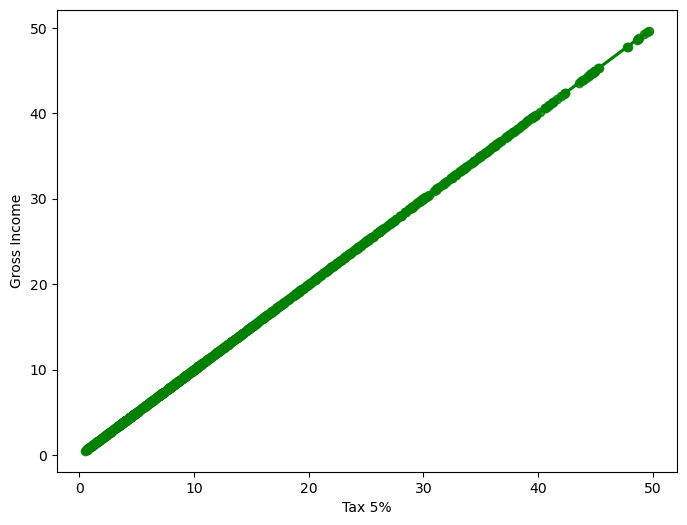

In [26]:
plt.figure(figsize=(8,6),dpi=100)
sns.regplot(x='tax_5%',y='gross_income',data=df,color='green')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

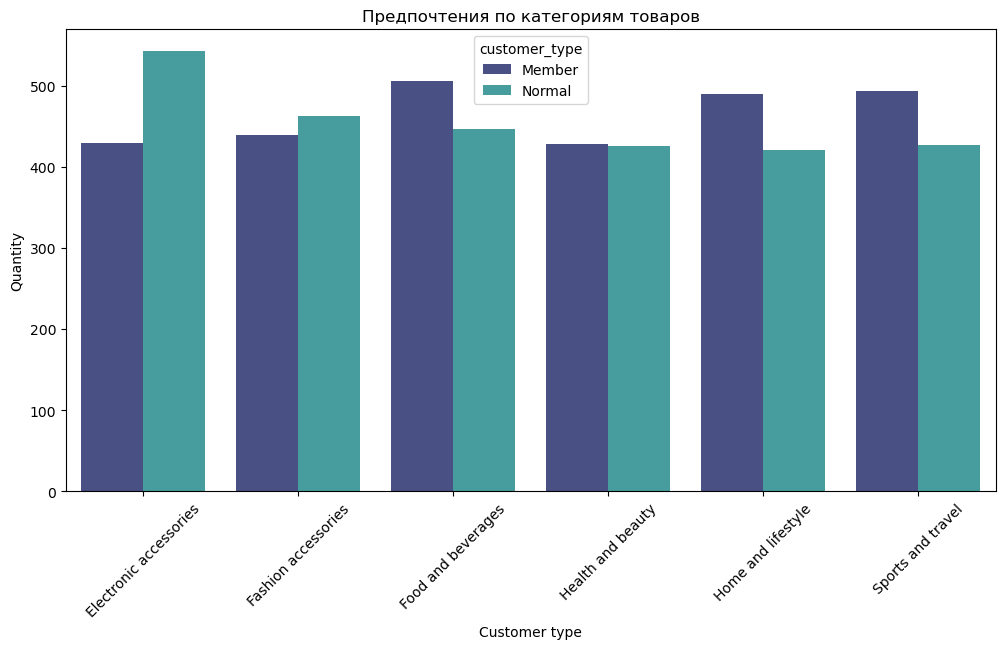

In [27]:
product_preferences = df.groupby(['customer_type', 'product_line'])['quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=product_preferences, x='product_line', y='quantity', hue='customer_type', palette='mako')
plt.title('Предпочтения по категориям товаров')
plt.xlabel('Customer type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2453975015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_line_ratings, x='product_line', y='rating', palette='viridis')


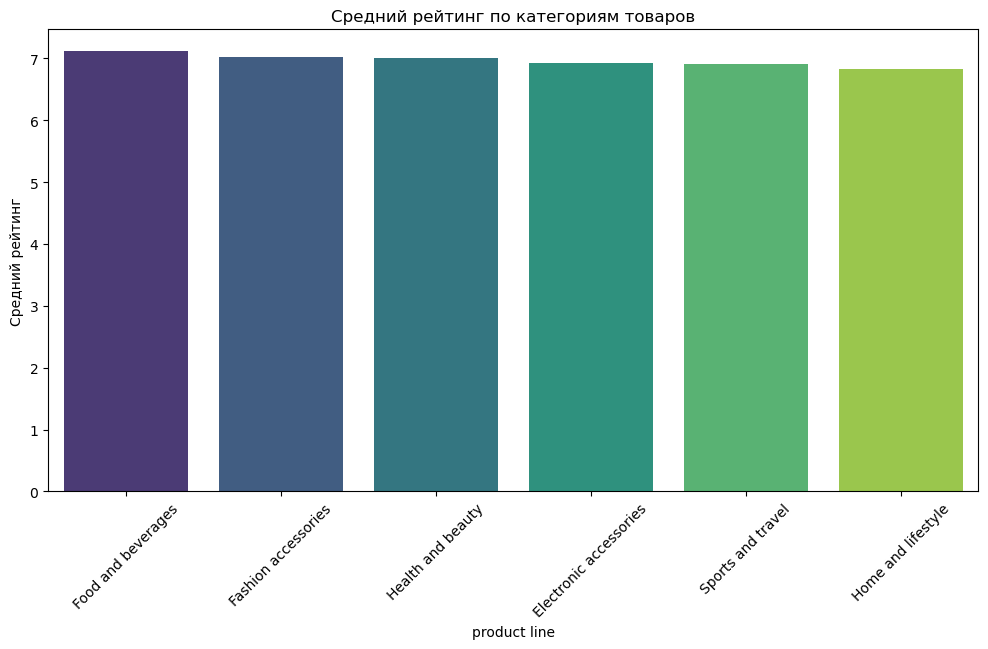

In [28]:
product_line_ratings = df.groupby('product_line')['rating'].mean().reset_index().sort_values('rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=product_line_ratings, x='product_line', y='rating', palette='viridis')
plt.title('Средний рейтинг по категориям товаров')
plt.xlabel('product line')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16988\229992471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=branch_ratings, x='branch', y='rating', palette='rocket')


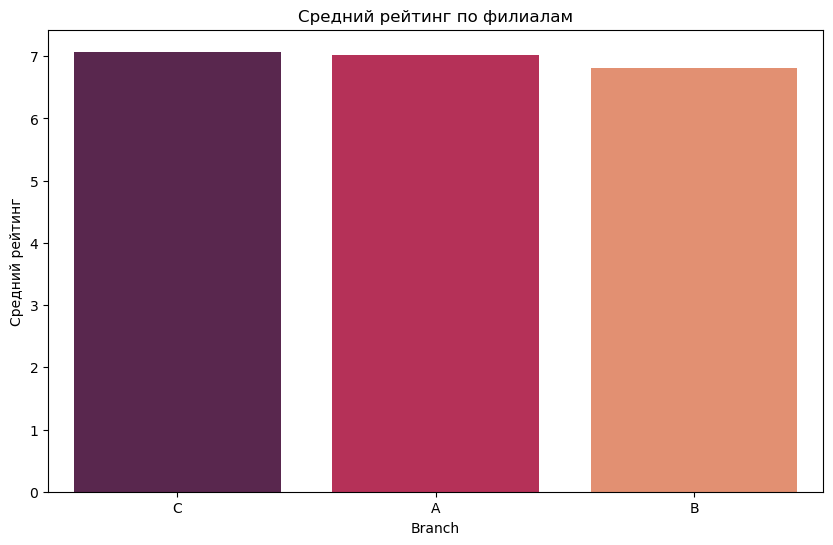

In [29]:
branch_ratings = df.groupby('branch')['rating'].mean().reset_index().sort_values('rating', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=branch_ratings, x='branch', y='rating', palette='rocket')
plt.title('Средний рейтинг по филиалам')
plt.xlabel('Branch')
plt.ylabel('Средний рейтинг')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16988\2834623886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'city', y = 'rating', palette = 'coolwarm')


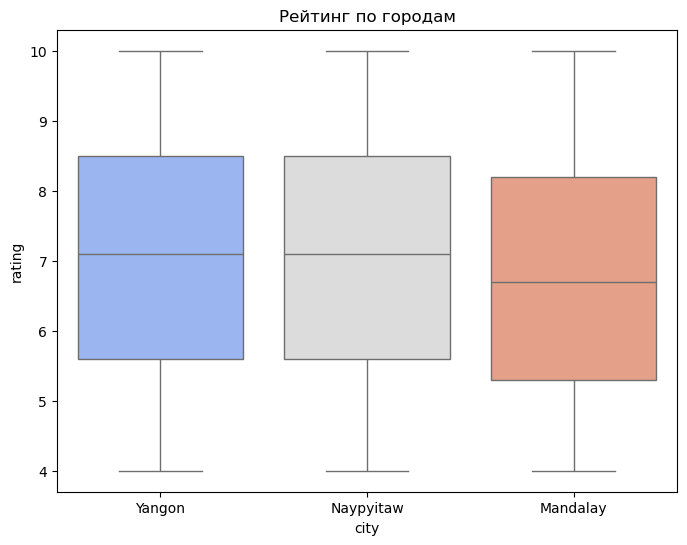

In [30]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'city', y = 'rating', palette = 'coolwarm')
plt.title('Рейтинг по городам')
plt.show()

По рейтинге выдно что оценка Mandalay чуть ниже по продажам по сравнени других городов.

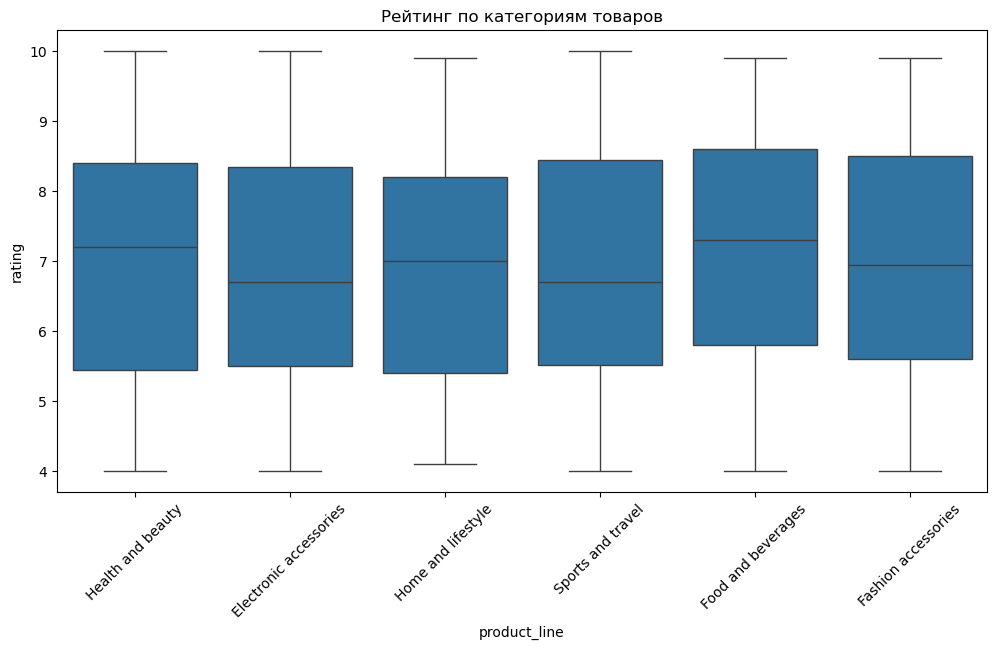

In [31]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'product_line', y = 'rating')
plt.xticks(rotation = 45)
plt.title('Рейтинг по категориям товаров')
plt.show()

- Нет категории, которая явно получает хуже или лучше оценки. Это подтверждает, что качество товаров в разных категориях воспринимается одинаково.
- В каждой категории есть клиенты, которые ставять низкие оценки. Это можеть говорить о неудовлетворенности сервисом или качеством товаров.